# SMLM -- bundled tubes long sequence (BTLS) data
Examining data from http://bigwww.epfl.ch/smlm/challenge/datasets/Bundled_Tubes_Long_Sequence-GT/index.html


In [1]:
import os 
import numpy as np
from PIL import Image

In [2]:
import matplotlib as mpl 
import matplotlib.pyplot as plt
mpl.rcParams['text.usetex'] = True
mpl.rcParams['font.family'] = 'serif'
mpl.rcParams['axes.linewidth'] = 1.5
mpl.rcParams['axes.xmargin'] = 1
mpl.rcParams['xtick.labelsize'] = 'x-large'
mpl.rcParams['xtick.major.size'] = 5
mpl.rcParams['xtick.major.width'] = 1.5
mpl.rcParams['ytick.labelsize'] = 'x-large'
mpl.rcParams['ytick.major.size'] = 5
mpl.rcParams['ytick.major.width'] = 1.5
mpl.rcParams['legend.frameon'] = False
%matplotlib inline

In [3]:
dir_tub = '/Users/ChangHoon/data/locahbay/smlm/bundled_tubes_long_seq/'

In [4]:
def read_frame(i): 
    f_frame = os.path.join(dir_tub, 'sequence', '%s.tif' % str(i).zfill(5))

    im = Image.open(f_frame)
    imarr = np.array(im)
    return imarr

def read_fluorophorses(i): 
    f_fluor = os.path.join(dir_tub, 'fluorophores', 'frames', '%s.csv' % str(i).zfill(5)) 
    
    x, y, z, I = np.loadtxt(f_fluor, delimiter=',', skiprows=1, unpack=True, usecols=[2,3,4,5]) # positions in nm
    # convert to pixels
    return np.array([x/100., y/100., z/100.])

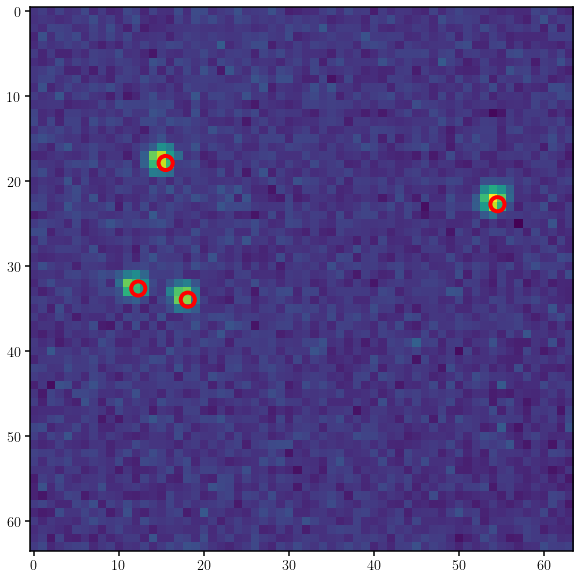

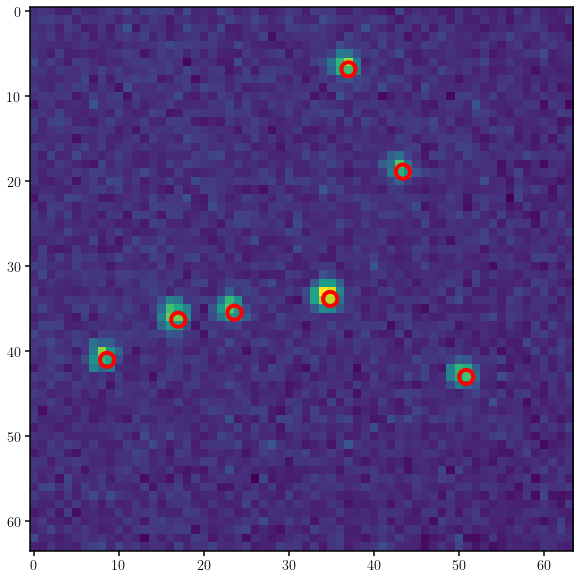

In [5]:
for i in [1, 489]: 
    frame = read_frame(i)
    truth = read_fluorophorses(i)

    fig = plt.figure(figsize=(10,10))
    plt.imshow(frame)
    plt.scatter(truth[0,:], truth[1,:], s=200, facecolors='none', edgecolor='r', linewidths=4)   